In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re

# Thu thập dữ liệu
## 3.1.1 Crawl dữ liệu từ trang web

Lưu kết quả vào file kq.txt

In [3]:
url='http://quotes.toscrape.com'
file = open("kq.txt","a",encoding="UTF-8")
for page in range(1,6):
    resp=requests.get(url+'/page/'+str(page)+'/')
    soup=BeautifulSoup(resp.content, "html.parser")
    file.write(str(soup))
file.close()

## 3.1.2
- Crawl link, trang, vị trí tác giả trong 5 page đầu

In [4]:
author_links=[]
for page in range(1,6):
    resp=requests.get(url+'/page/'+str(page)+'/')
    soup=BeautifulSoup(resp.content, "html.parser")
    link=[(url+i['href'],page, idx) for idx,i in enumerate(soup.select('span > a')[:10]) ]
    author_links+=link
author_links
    

[('http://quotes.toscrape.com/author/Albert-Einstein', 1, 0),
 ('http://quotes.toscrape.com/author/J-K-Rowling', 1, 1),
 ('http://quotes.toscrape.com/author/Albert-Einstein', 1, 2),
 ('http://quotes.toscrape.com/author/Jane-Austen', 1, 3),
 ('http://quotes.toscrape.com/author/Marilyn-Monroe', 1, 4),
 ('http://quotes.toscrape.com/author/Albert-Einstein', 1, 5),
 ('http://quotes.toscrape.com/author/Andre-Gide', 1, 6),
 ('http://quotes.toscrape.com/author/Thomas-A-Edison', 1, 7),
 ('http://quotes.toscrape.com/author/Eleanor-Roosevelt', 1, 8),
 ('http://quotes.toscrape.com/author/Steve-Martin', 1, 9),
 ('http://quotes.toscrape.com/author/Marilyn-Monroe', 2, 0),
 ('http://quotes.toscrape.com/author/J-K-Rowling', 2, 1),
 ('http://quotes.toscrape.com/author/Albert-Einstein', 2, 2),
 ('http://quotes.toscrape.com/author/Bob-Marley', 2, 3),
 ('http://quotes.toscrape.com/author/Dr-Seuss', 2, 4),
 ('http://quotes.toscrape.com/author/Douglas-Adams', 2, 5),
 ('http://quotes.toscrape.com/author/Elie-

- Đọc tất cả các thẻ html (div) với lớp là quote và lưu vào biến "result"

In [55]:
result=[]
for page in range(1,6):
    resp=requests.get(url+'/page/'+str(page)+'/')
    soup=BeautifulSoup(resp.content, "html.parser")
    result+=soup.select('div.quote')
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

- Tìm trong biến "result" các nhãn "small" với class là "author"

In [7]:
tacgia=[]
for tg in result:
    tacgia+= tg.select('small.author')
print(tacgia)

[<small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Jane Austen</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">André Gide</small>, <small class="author" itemprop="author">Thomas A. Edison</small>, <small class="author" itemprop="author">Eleanor Roosevelt</small>, <small class="author" itemprop="author">Steve Martin</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Bob Marley</small>, <small class="author" itemprop="author">Dr. Seuss</small>, <small class="author" itemprop="author">Douglas Adam

- Viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả

In [8]:

def tacgiaLink(author):
    link, page_idx, author_idx=author
    soup1=BeautifulSoup(requests.get((url+'/page/'+str(page_idx)+'/')).text,'html.parser')
    tentacgia=soup1.select('small.author')[author_idx].text
    quote=re.sub('[”“]','',soup1.select('span.text')[author_idx].text)
    soup2=BeautifulSoup(requests.get(link).text,'html.parser')
    ngaysinh = pd.to_datetime(soup2.select_one('span.author-born-date').text)
    return {
        'Tacgia': [tentacgia],
        'Link': [link],
        'Namsinh': [ngaysinh],
        'Quotes': [quote]
    }

- Tạo thành một dataframe

In [9]:
df=pd.DataFrame(columns=['Tacgia','Link','Namsinh','Quotes'])
df

,Tacgia,Link,Namsinh,Quotes


In [10]:
for author in author_links:
    tacgia=tacgiaLink(author)
    df=pd.concat([df,pd.DataFrame(tacgia)])

In [11]:
df=df.reset_index(drop=True)

- Lưu vào file Quotes.csv

In [12]:
df.to_csv('Quote.csv')

# 3.2. Khai phá dữ liệu

In [3]:
df=pd.read_csv('Quote.csv',index_col=0, parse_dates=['Namsinh'])
df.head()

,Tacgia,Link,Namsinh,Quotes
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,The world as we have created it is a process o...
1,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"It is our choices, Harry, that show what we tr..."
2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,There are only two ways to live your life. One...
3,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"The person, be it gentleman or lady, who has n..."
4,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"Imperfection is beauty, madness is genius and ..."


## 3.2.1. Xử lý dữ liệu

- Thêm Trường STT và điền tự động dữ liệu của trường

In [4]:
df=df.reset_index()

In [5]:
df= df.rename(columns={'index':'STT'})

In [6]:
df['STT']= df['STT']

In [7]:
df

,STT,Tacgia,Link,Namsinh,Quotes
0,0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,The world as we have created it is a process o...
1,1,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"It is our choices, Harry, that show what we tr..."
2,2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,There are only two ways to live your life. One...
3,3,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"The person, be it gentleman or lady, who has n..."
4,4,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"Imperfection is beauty, madness is genius and ..."
5,5,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,Try not to become a man of success. Rather bec...
6,6,André Gide,http://quotes.toscrape.com/author/Andre-Gide,1869-11-22,It is better to be hated for what you are than...
7,7,Thomas A. Edison,http://quotes.toscrape.com/author/Thomas-A-Edison,1847-02-11,"I have not failed. I've just found 10,000 ways..."
8,8,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,1884-10-11,A woman is like a tea bag; you never know how ...
9,9,Steve Martin,http://quotes.toscrape.com/author/Steve-Martin,1945-08-14,"A day without sunshine is like, you know, night."


- Dữ liệu chúng em crawl nên Trường ngày sinh đã có. Nhưng nếu Trường ngày sinh chưa có thì chúng em đề xuất cách điền là tìm trên mạng thông tin ngày sinh của người đó và điền vào dữ liệu.

- Thêm trường tuổi và đề xuất cách điền tuổi:
Vì số lượng dữ liệu có hạn nên chúng em đề xuất cách điền tuổi bằng tay.

In [8]:
df.Tacgia.unique().tolist()

['Albert Einstein',
 'J.K. Rowling',
 'Jane Austen',
 'Marilyn Monroe',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin',
 'Bob Marley',
 'Dr. Seuss',
 'Douglas Adams',
 'Elie Wiesel',
 'Friedrich Nietzsche',
 'Mark Twain',
 'Allen Saunders',
 'Pablo Neruda',
 'Ralph Waldo Emerson',
 'Mother Teresa',
 'Garrison Keillor',
 'Jim Henson',
 'Charles M. Schulz',
 'William Nicholson',
 'Jorge Luis Borges',
 'George Eliot',
 'George R.R. Martin',
 'C.S. Lewis',
 'Martin Luther King Jr.',
 'James Baldwin']

In [9]:
Tuoi=[76, 57, 41, 36, 81, 84, 78, 77, 36, 34, 71, 87, 56, 74, 87, 69, 78, 87, 80, 53, 77, 77, 87, 61, 74, 45, 39, 63]

In [10]:
Tuoidict = dict(zip(df.Tacgia.unique().tolist(), Tuoi))

In [11]:
Tuoidict

{'Albert Einstein': 76,
 'J.K. Rowling': 57,
 'Jane Austen': 41,
 'Marilyn Monroe': 36,
 'André Gide': 81,
 'Thomas A. Edison': 84,
 'Eleanor Roosevelt': 78,
 'Steve Martin': 77,
 'Bob Marley': 36,
 'Dr. Seuss': 34,
 'Douglas Adams': 71,
 'Elie Wiesel': 87,
 'Friedrich Nietzsche': 56,
 'Mark Twain': 74,
 'Allen Saunders': 87,
 'Pablo Neruda': 69,
 'Ralph Waldo Emerson': 78,
 'Mother Teresa': 87,
 'Garrison Keillor': 80,
 'Jim Henson': 53,
 'Charles M. Schulz': 77,
 'William Nicholson': 77,
 'Jorge Luis Borges': 87,
 'George Eliot': 61,
 'George R.R. Martin': 74,
 'C.S. Lewis': 45,
 'Martin Luther King Jr.': 39,
 'James Baldwin': 63}

In [12]:
df['Tuoi']=df['Tacgia'].map(Tuoidict)

In [13]:
df

,STT,Tacgia,Link,Namsinh,Quotes,Tuoi
0,0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,The world as we have created it is a process o...,76
1,1,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"It is our choices, Harry, that show what we tr...",57
2,2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,There are only two ways to live your life. One...,76
3,3,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"The person, be it gentleman or lady, who has n...",41
4,4,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"Imperfection is beauty, madness is genius and ...",36
5,5,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,Try not to become a man of success. Rather bec...,76
6,6,André Gide,http://quotes.toscrape.com/author/Andre-Gide,1869-11-22,It is better to be hated for what you are than...,81
7,7,Thomas A. Edison,http://quotes.toscrape.com/author/Thomas-A-Edison,1847-02-11,"I have not failed. I've just found 10,000 ways...",84
8,8,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,1884-10-11,A woman is like a tea bag; you never know how ...,78
9,9,Steve Martin,http://quotes.toscrape.com/author/Steve-Martin,1945-08-14,"A day without sunshine is like, you know, night.",77


# 3.2.2. Khám phá dữ liệu- Data Exploration

In [14]:
print('Kích thước của dữ liệu: ',df.shape)

Kích thước của dữ liệu:  (50, 6)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STT      50 non-null     int64         
 1   Tacgia   50 non-null     object        
 2   Link     50 non-null     object        
 3   Namsinh  50 non-null     datetime64[ns]
 4   Quotes   50 non-null     object        
 5   Tuoi     50 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.5+ KB


In [16]:
df.describe()

,STT,Tuoi
count,50.00000,50.000000
mean,24.50000,61.780000
std,14.57738,18.859621
min,0.00000,34.000000
25%,12.25000,39.500000
50%,24.50000,66.000000
75%,36.75000,76.750000
max,49.00000,87.000000


In [17]:
df.isna().sum()

STT        0
Tacgia     0
Link       0
Namsinh    0
Quotes     0
Tuoi       0
dtype: int64

## Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu
Top 10 người nổi tiếng có số lượng câu nói trong bộ dữ liệu là nhiều nhất

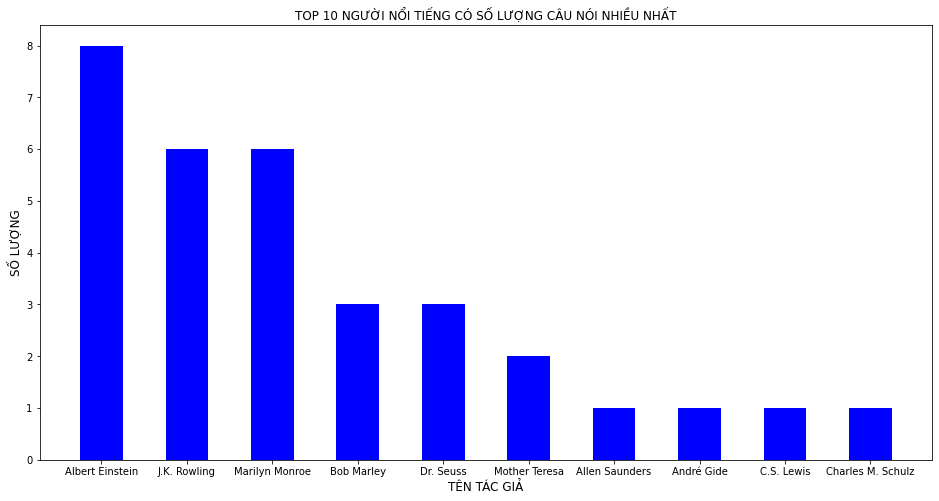

In [18]:
data1=df.groupby('Tacgia').count()['Quotes'].nlargest(10)

plt.figure(figsize=(16, 8))

plt.bar(data1.index, data1, color='blue', width=0.5)
plt.xlabel('TÊN TÁC GIẢ', fontsize=12)
plt.ylabel('SỐ LƯỢNG', fontsize=12)
plt.title('TOP 10 NGƯỜI NỔI TIẾNG CÓ SỐ LƯỢNG CÂU NÓI NHIỀU NHẤT')

plt.show()

## Thống kê về năm sinh và độ tuổi của các tác giả

Top 10 người nổi tiếng có độ tuổi cao nhất

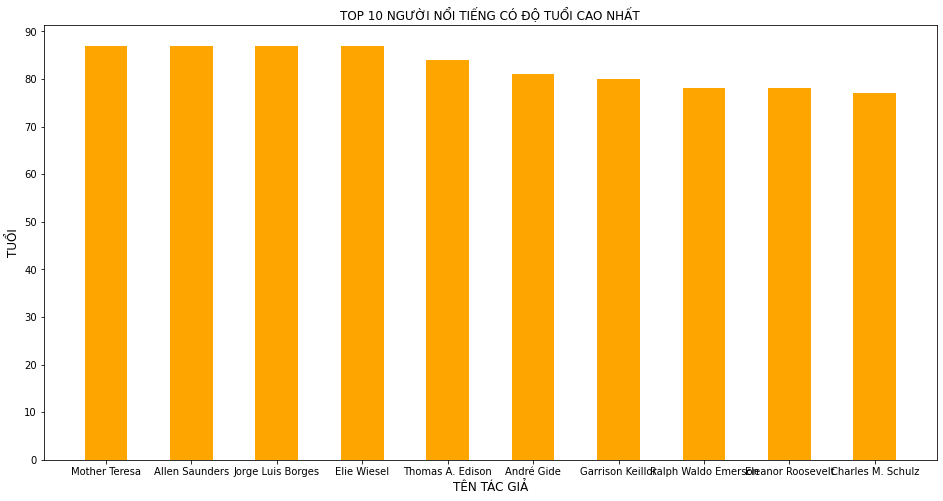

In [19]:
data2=df.sort_values(by=['Tuoi'], ascending=False)[['Tacgia','Tuoi']].drop_duplicates().head(10)

plt.figure(figsize=(16, 8))
plt.bar(data2['Tacgia'],data2['Tuoi'],color='orange',width=0.5)

plt.xlabel('TÊN TÁC GIẢ', fontsize=12)
plt.ylabel('TUỔI', fontsize=12)
plt.title('TOP 10 NGƯỜI NỔI TIẾNG CÓ ĐỘ TUỔI CAO NHẤT')

plt.yticks(np.arange(0, max(data2['Tuoi'])+11, 10))

plt.show()

Top 10 năm sinh có nhiều tác giả nhất
- Tạo cột Nam được tách từ Namsinh

In [20]:
df['Nam']= df['Namsinh'].apply(lambda x: x.year)

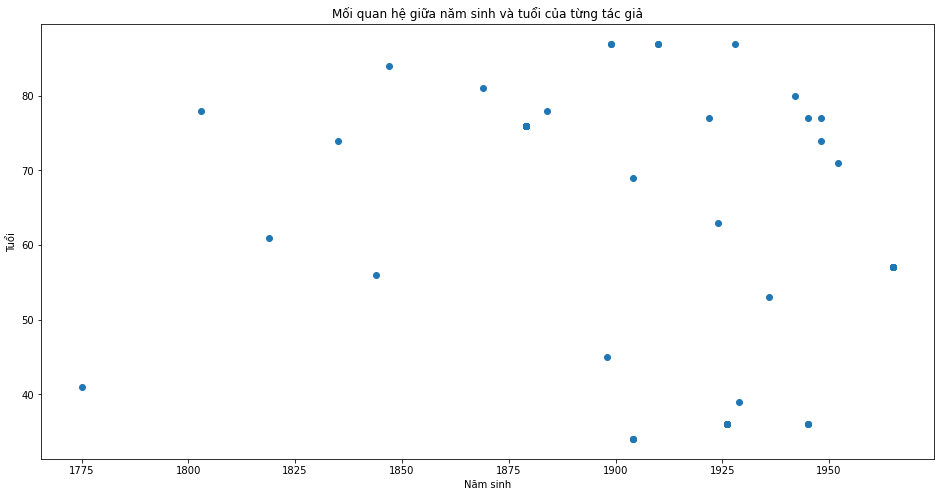

In [30]:
# Vẽ biểu đồ phân tán
fig, ax = plt.subplots(figsize= (16,8))
ax.scatter(df['Nam'], df['Tuoi'])

ax.set_xlabel('Năm sinh')
ax.set_ylabel('Tuổi')

ax.set_title('Mối quan hệ giữa năm sinh và tuổi của từng tác giả')

plt.show()

## Thống kê về câu nói nổi tiếng 
Top 10 người nỗi tiếng có độ dài câu nói dài nhất
- Tạo cột ChieudaiQuote cho dataframe

In [33]:
# thêm trường Độ dài câu dài 
df['ChieudaiQuote']= df['Quotes'].apply(lambda x: len(x))

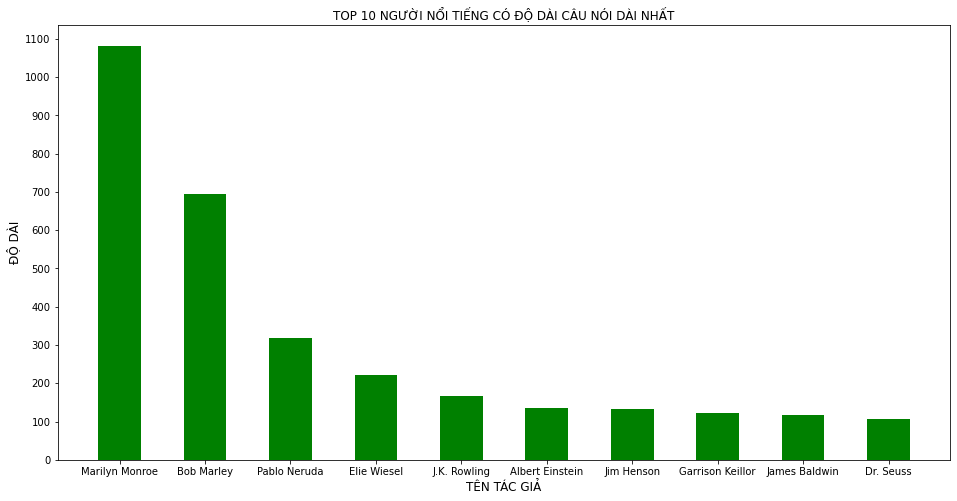

In [ ]:
data4= df.sort_values(by=['ChieudaiQuote'], ascending=False)[['Tacgia','ChieudaiQuote']].drop_duplicates(subset=['Tacgia']).head(10)

plt.figure(figsize=(16, 8))
plt.bar(data4['Tacgia'],data4['ChieudaiQuote'],color='green',width=0.5)

plt.xlabel('TÊN TÁC GIẢ', fontsize=12)
plt.ylabel('ĐỘ DÀI', fontsize=12)
plt.title('TOP 10 NGƯỜI NỔI TIẾNG CÓ ĐỘ DÀI CÂU NÓI DÀI NHẤT')

plt.yticks(np.arange(0, max(data4['ChieudaiQuote']+ 111), 100))

plt.show()

Top 10 người nổi tiếng có độ dài câu nói ngắn nhất

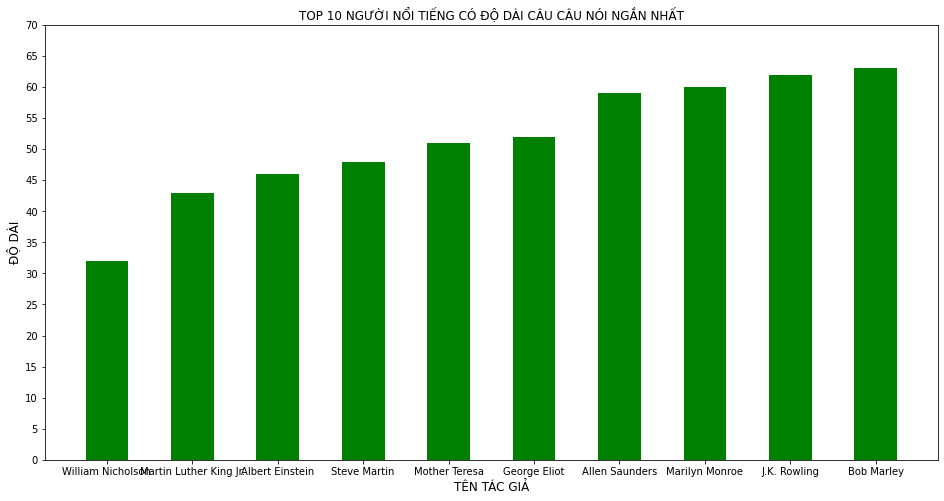

In [ ]:
data5= df.sort_values(by=['ChieudaiQuote'])[['Tacgia','ChieudaiQuote']].drop_duplicates(subset=['Tacgia']).head(10)

plt.figure(figsize=(16, 8))
plt.bar(data5['Tacgia'],data5['ChieudaiQuote'],color='green',width=0.5)

plt.xlabel('TÊN TÁC GIẢ', fontsize=12)
plt.ylabel('ĐỘ DÀI', fontsize=12)
plt.title('TOP 10 NGƯỜI NỔI TIẾNG CÓ ĐỘ DÀI CÂU CÂU NÓI NGẮN NHẤT')
plt.yticks(np.arange(0, max(data5['ChieudaiQuote'])+11, 5))

plt.show()

10 tác giá có số lượng từ trong quote nhiều nhất
- Tạo cột SotuQuote cho dataframe

In [34]:
df['SotuQuote']= df.Quotes.apply(lambda x: len(x.split()))

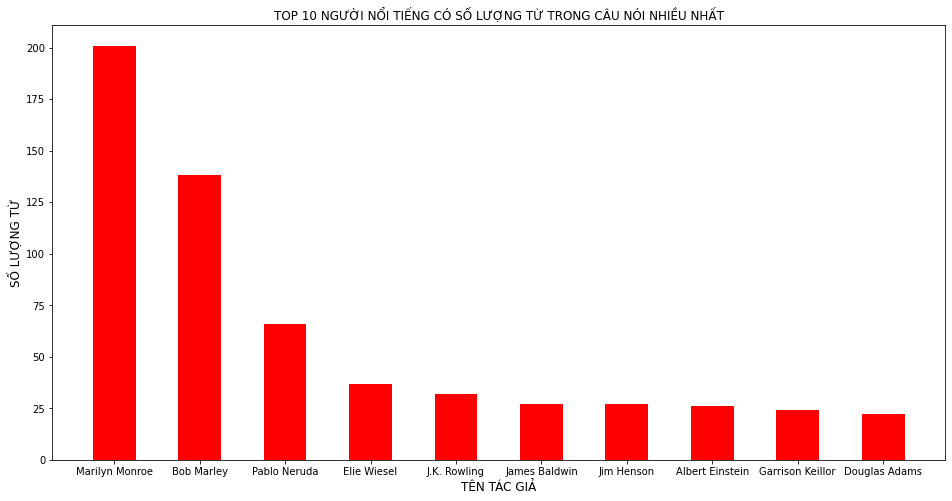

In [ ]:
data6=df.sort_values(by=['SotuQuote'], ascending=False)[['Tacgia','SotuQuote']].drop_duplicates(subset=['Tacgia']).head(10)

plt.figure(figsize=(16, 8))
plt.bar(data6['Tacgia'],data6['SotuQuote'],color='red',width=0.5)

plt.xlabel('TÊN TÁC GIẢ', fontsize=12)
plt.ylabel('SỐ LƯỢNG TỪ', fontsize=12)
plt.title('TOP 10 NGƯỜI NỔI TIẾNG CÓ SỐ LƯỢNG TỪ TRONG CÂU NÓI NHIỀU NHẤT')

plt.show()

Top 10 người nổi tiếng có số lượng từ trong quote ít nhất

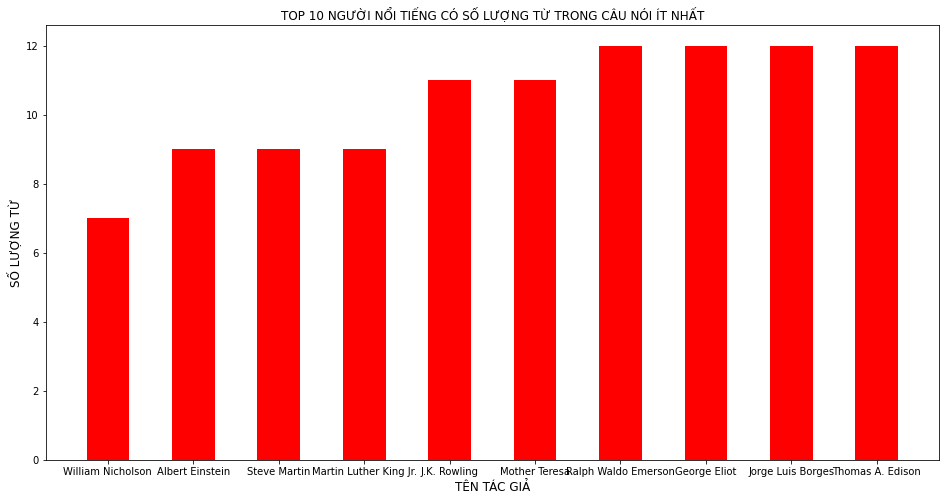

In [ ]:
data7=df.sort_values(by=['SotuQuote'])[['Tacgia','SotuQuote']].drop_duplicates(subset=['Tacgia']).head(10)

plt.figure(figsize=(16, 8))
plt.bar(data7['Tacgia'],data7['SotuQuote'],color='red',width=0.5)

plt.xlabel('TÊN TÁC GIẢ', fontsize=12)
plt.ylabel('SỐ LƯỢNG TỪ', fontsize=12)
plt.title('TOP 10 NGƯỜI NỔI TIẾNG CÓ SỐ LƯỢNG TỪ TRONG CÂU NÓI ÍT NHẤT')

plt.show()

## Thống kê về các từ được sử dụng trong các câu nói
Top 10 các từ được sử dụng nhiều nhất trong câu nói
- Đầu tiên làm một list tất cả các câu nói 

In [ ]:
quotes= df['Quotes'].tolist()
quotes

['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.',
 'It is our choices, Harry, that show what we truly are, far more than our abilities.',
 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.',
 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.',
 "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.",
 'Try not to become a man of success. Rather become a man of value.',
 'It is better to be hated for what you are than to be loved for what you are not.',
 "I have not failed. I've just found 10,000 ways that won't work.",
 "A woman is like a tea bag; you never know how strong it is until it's in hot water.",
 'A day without sunshine is like, you know, night.',
 "This life is what you make it. No matter what, you're going to mess up so

- Tiếp đó, đếm các từ có trong câu nói-> lấy top 10

In [ ]:
words=[]
for quote in df['Quotes']:
    words += quote.lower().split()
    word_counts = Counter(words)
word_counts.most_common(10)

[('you', 57),
 ('is', 43),
 ('to', 39),
 ('a', 36),
 ('the', 33),
 ('of', 23),
 ('it', 21),
 ('not', 20),
 ('and', 19),
 ('but', 18)]

- Lấy 2 list : 1 list là các từ; 1 list là số lượng xuất hiện của từ đó<br>
- Vẽ biểu đồ

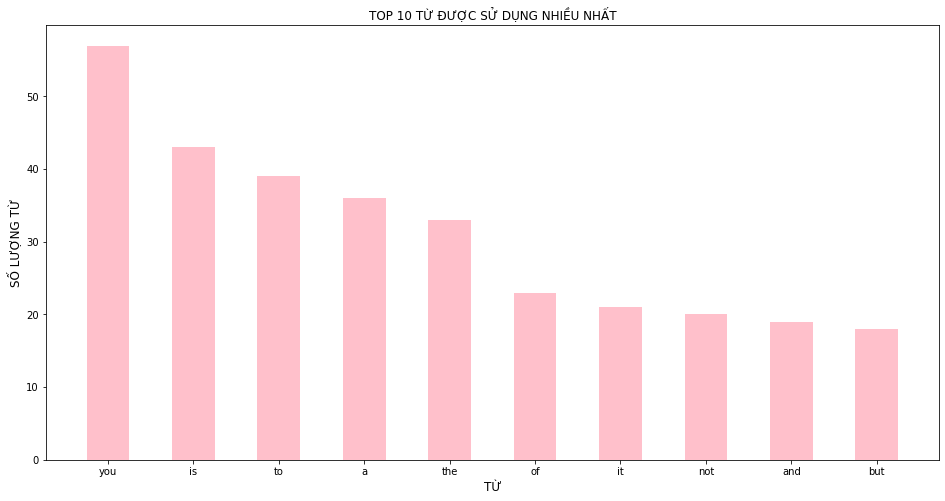

In [ ]:
top_words=word_counts.most_common(10)
words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]
plt.figure(figsize=(16, 8))
plt.bar(words, frequencies, color='pink',width=0.5)

plt.xlabel('TỪ', fontsize=12)
plt.ylabel('SỐ LƯỢNG TỪ', fontsize=12)
plt.title('TOP 10 TỪ ĐƯỢC SỬ DỤNG NHIỀU NHẤT')

plt.show()

## Trực quan mối quan hệ giữa tác giả và câu nói nổi tiếng
- Mối quan hệ giữa số lượng câu nói và độ dài trung bình của các câu nói của từng tác giả

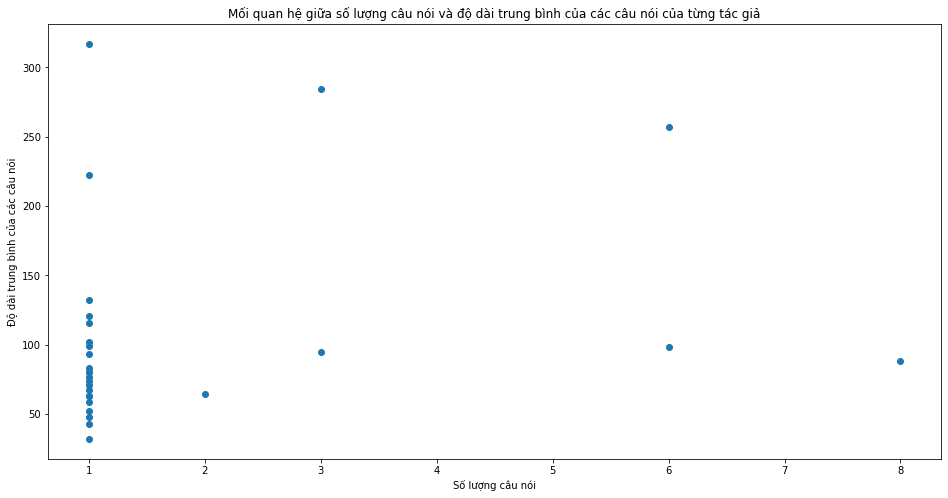

In [35]:
# Tính số lượng câu nói và độ dài trung bình của các câu nói của từng tác giả
# lấy count của Quotes và lấy mean: trung bình của ChieudaiQuote
data = df.groupby('Tacgia').agg({'Quotes': 'count', 'ChieudaiQuote': 'mean'})

# Vẽ biểu đồ phân tán
fig, ax = plt.subplots(figsize= (16,8))
ax.scatter(data['Quotes'], data['ChieudaiQuote'])

ax.set_xlabel('Số lượng câu nói')
ax.set_ylabel('Độ dài trung bình của các câu nói')

ax.set_title('Mối quan hệ giữa số lượng câu nói và độ dài trung bình của các câu nói của từng tác giả')

plt.show()

# 3.2.3. Trích xuất đặc trưng - Feature Extraction
- Chuyển cột Tacgia thành số để tạo thành 1 feature

In [38]:
from  sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [39]:
df['Tacgia'] = encoder.fit_transform(df.Tacgia)

In [40]:
df['Tacgia'].values

array([ 0, 14,  0, 16, 19,  0,  2, 26,  8, 25, 19, 14,  0,  3,  7,  6,  9,
       10, 20,  1, 23, 24, 22, 11, 17,  7,  0, 14,  0,  3,  7, 14,  3, 22,
       14,  5, 27,  0, 18, 12, 13,  4, 19, 19,  0, 19, 19, 21, 14, 15])

- Tạo ra feature Ngay, Thang từ Ngaysinh

In [41]:
df['Ngay'] =df['Namsinh'].apply(lambda x: x.day)
df['Thang'] =df['Namsinh'].apply(lambda x: x.month)

In [42]:
encoder.classes_

array(['Albert Einstein', 'Allen Saunders', 'André Gide', 'Bob Marley',
       'C.S. Lewis', 'Charles M. Schulz', 'Douglas Adams', 'Dr. Seuss',
       'Eleanor Roosevelt', 'Elie Wiesel', 'Friedrich Nietzsche',
       'Garrison Keillor', 'George Eliot', 'George R.R. Martin',
       'J.K. Rowling', 'James Baldwin', 'Jane Austen', 'Jim Henson',
       'Jorge Luis Borges', 'Marilyn Monroe', 'Mark Twain',
       'Martin Luther King Jr.', 'Mother Teresa', 'Pablo Neruda',
       'Ralph Waldo Emerson', 'Steve Martin', 'Thomas A. Edison',
       'William Nicholson'], dtype=object)

- Biểu đồ mối tương quan giữa các thuộc tính

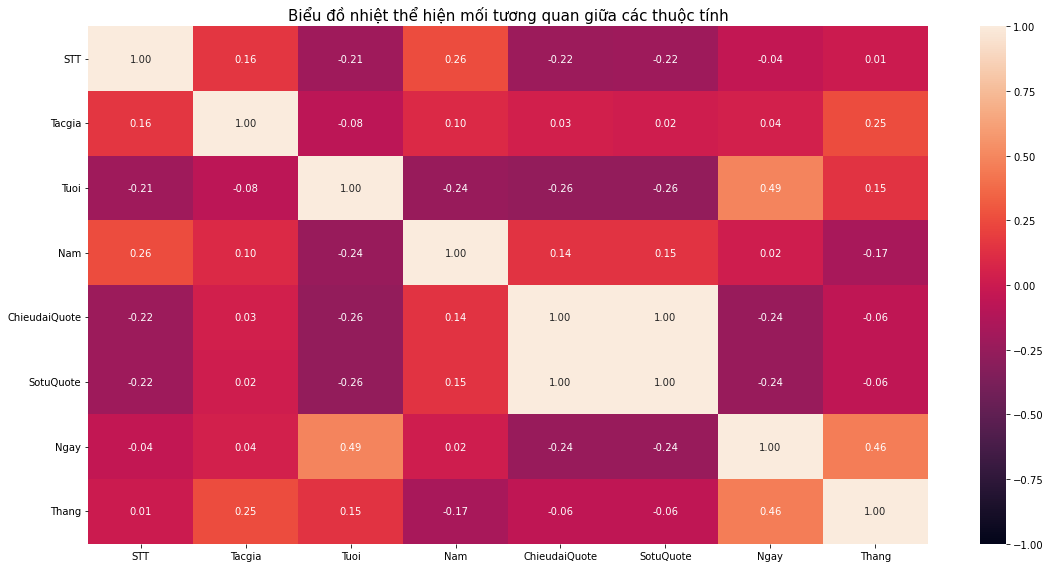

In [43]:
f, ax =plt.subplots(figsize= (16,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title("Biểu đồ nhiệt thể hiện mối tương quan giữa các thuộc tính", fontsize=15)
f.tight_layout()
plt.show()

Feature phù hợp là: 'Tuoi', 'ChieudaiQuote', 'SotuQuote'

## Suy luận

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
features=['Tuoi', 'ChieudaiQuote','SotuQuote']
target='Tacgia'

In [ ]:
X = df[features].values
y = df[target].values

In [ ]:
# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Huấn luyện mô hình Random Forest bằng cách sử dụng RandomForestClassifier trong Scikit-learn

In [ ]:
#Mô hình Random Forest với 100 cây quyết định
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Làm một dự đoán
y_pred = rfc.predict(X_test)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)

print('Độ chính xác của mô hình:', accuracy)

Độ chính xác của mô hình: 0.4


Huấn luyện mô hình Linear Support Vector Machine (SVM)

In [ ]:
# Khởi tạo mô hình Linear SVM
clf = LinearSVC(random_state=0, tol=1e-5)

# Huấn luyện mô hình
clf.fit(X, y)

# Dự đoán class của các điểm dữ liệu mới
y_pred = clf.predict(X_test)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)

print('Độ chính xác của mô hình:', accuracy)


Độ chính xác của mô hình: 0.1


c:\Users\tytyn\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Huấn luyện mô hình Gaussian Naive Bayes

In [ ]:
# Khởi tạo mô hình Gaussian Naive Bayes
gnb = GaussianNB()

# Huấn luyện mô hình trên tập train
gnb.fit(X_train, y_train)

# Dự đoán class của các điểm dữ liệu trong tập test
y_pred = gnb.predict(X_test)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình:', accuracy)

Độ chính xác của mô hình: 0.3


-> Kết quả tốt nhất là Random Forest và Gaussian Naive Bayes với độ chính xác lớn hơn hoặc bằng 30%

- Chúng em đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả là tính số lượng từ trong quote trùng nhau trong 2 quote của 2 tác giả